# Training Deep Neural Networks

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/UAPH4582/PH482_582/blob/main/HW3_training_deep_neural_networks.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [1]:
group_name = ""
names = ["a", "b", "c"]

Due date: 2022-03-14

File name convention: For group 42 and memebers Richard Stallman and Linus Torvalds it would be 
"05_training_deep_neural_networks.pdf".

Submission via blackboard (UA) or Google Form (see notion, LPC).

Feel free to answer free text questions in text cells using markdown and possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended for you to try to understand every line of code.   
Big blocks of code are usually meant to just be clicked through.**

# Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

%load_ext tensorboard

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Vanishing/Exploding Gradients Problem

### TASK 1: Sigmoid, Relu, Leaky Relu

In [3]:
def logit(z):
    return 1 / (1 + np.exp(-z))

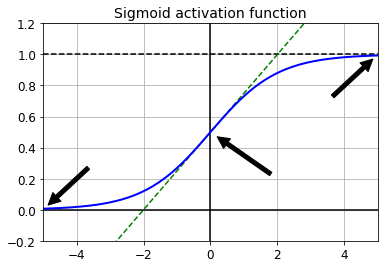

In [4]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), "b-", linewidth=2)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

**Task 1 a)** Describe the sigmoid activation function.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 1 a) answer: 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

### Leaky ReLU

**Task 1 b)** Write the [leaky relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)#Leaky_ReLU) function `leaky_relu(z)`.
It should take `z` as argument and also another optional argument `alpha` with default value 0.01.
The leaky relu funciton is defined to be `alpha*z` for z<0 and `z` for z>0.

(alterntively you can think about using `np.maximum` to make the distinction, assuming alpha>0)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [5]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

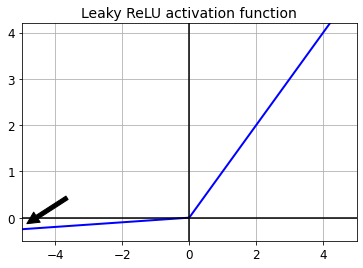

In [6]:
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

**Task 1c)** Describe the difference between relu and leaky relu?
Also explain why one might want to use leaky relu.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 1c) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

##### Let's train a neural network on Fashion MNIST using the Leaky ReLU:

In [7]:
# load fashion MNIST + train_test split
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [10]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
  57/1719 [..............................] - ETA: 4s - loss: 2.2482 - accuracy: 0.1749

2022-03-08 09:13:01.814464: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1719/1719 [==============================] - 7s 3ms/step - loss: 1.2819 - accuracy: 0.6228 - val_loss: 0.8886 - val_accuracy: 0.7158
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7658
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6816 - accuracy: 0.7720 - val_loss: 0.6427 - val_accuracy: 0.7894
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6217 - accuracy: 0.7945 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5832 - accuracy: 0.8075 - val_loss: 0.5582 - val_accuracy: 0.8196
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8236
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5338 - accuracy: 0.8225 - val_loss: 0.5157 - val_accuracy: 0.8304
Epo

### TASK 2: ELU
**Task 2 a)** Describe the [ELU activation](https://paperswithcode.com/method/elu) function and compare to LeakyRelu. The definition is described in Chapter 11 or alternatively [here](https://paperswithcode.com/method/elu).   

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 2 a) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

**Task 2 b)** Similar to `leaky_relu` above, write the function `elu(z)` with optional argument `alpha=1` (meaning that the default value is 1).

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [11]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

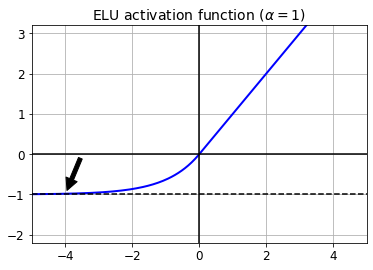

In [12]:
plt.plot(z, elu(z), "b-", linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.annotate('', xytext=(-3.5, 0), xy=(-4, -1), arrowprops=props, fontsize=14, ha="center")
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [13]:
tf.random.set_seed(42)
np.random.seed(42)

To use the elu activation function in TensorFlow you need to specify the activation function when building each layer (Check on https://keras.io/api/layers/activations/ for some examples): `activation='relu'`

**Task 2 c)** Using the layers from the previous model (LeakyRelu), train with ELU activation

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [14]:
### model = ...

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation = "elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation = "elu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [17]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.1201 - accuracy: 0.6462 - val_loss: 0.7927 - val_accuracy: 0.7376
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7228 - accuracy: 0.7569 - val_loss: 0.6571 - val_accuracy: 0.7820
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6316 - accuracy: 0.7878 - val_loss: 0.5999 - val_accuracy: 0.8022
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5824 - accuracy: 0.8044 - val_loss: 0.5562 - val_accuracy: 0.8216
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5508 - accuracy: 0.8149 - val_loss: 0.5306 - val_accuracy: 0.8268
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5281 - accuracy: 0.8201 - val_loss: 0.5113 - val_accuracy: 0.8296
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5108 - accuracy: 0.8254 - val_loss: 0.4957 - val_accuracy:

## Task 3: Batch Normalization
**Task 3 a)** Build a NN with two hidden layers with 300 and 100 nodes. Use RELU as activation function. Add [BatchNormalization](https://keras.io/api/layers/normalization_layers/batch_normalization/) layers before each dense layer (check the definition in Chapter 11)   

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    # ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ 

    # ↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ 
    keras.layers.Dense(10, activation="softmax")
])

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

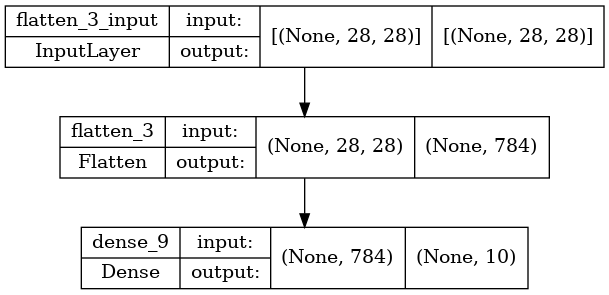

In [21]:
keras.utils.plot_model(model, show_shapes=True)

In [22]:
history = model.fit(X_train, y_train, epochs=25,
                    validation_data=(X_valid, y_valid))

Epoch 1/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.5106 - accuracy: 0.5519 - val_loss: 1.1230 - val_accuracy: 0.6748
Epoch 2/25
1719/1719 [==============================] - 5s 3ms/step - loss: 1.0174 - accuracy: 0.6863 - val_loss: 0.9184 - val_accuracy: 0.7140
Epoch 3/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8827 - accuracy: 0.7207 - val_loss: 0.8280 - val_accuracy: 0.7442
Epoch 4/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8118 - accuracy: 0.7437 - val_loss: 0.7715 - val_accuracy: 0.7636
Epoch 5/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7652 - accuracy: 0.7581 - val_loss: 0.7333 - val_accuracy: 0.7762
Epoch 6/25
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7312 - accuracy: 0.7691 - val_loss: 0.7041 - val_accuracy: 0.7842
Epoch 7/25
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7047 - accuracy: 0.7773 - val_loss: 0.6807 - val_accuracy:

**Task 3 b)** Explain what batch normalization does and discuss the results of above training.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 3b) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 4: Reusing a Keras model

Let's split the fashion MNIST training set in two:
* `X_train_A`: all images of all items except for sandals and shirts (classes 5 and 6).
* `X_train_B`: a much smaller training set of just the first 200 images of sandals or shirts.

The validation set and the test set are also split this way, but without restricting the number of images.

We will train a model on set A (classification task with 8 classes), and try to reuse it to tackle set B (binary classification). We hope to transfer a little bit of knowledge from task A to task B, since classes in set A (sneakers, ankle boots, coats, t-shirts, etc.) are somewhat similar to classes in set B (sandals and shirts). However, since we are using `Dense` layers, only patterns that occur at the same location can be reused (in contrast, convolutional layers will transfer much better, since learned patterns can be detected anywhere on the image, as we will see in the CNN chapter).

In [23]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [24]:
X_train_A.shape

(43986, 28, 28)

In [25]:
X_train_B.shape

(200, 28, 28)

In [26]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [27]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [28]:
tf.random.set_seed(42)
np.random.seed(42)

In [29]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

In [30]:
model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

/home/mknipfer/anaconda3/envs/DelayLineDetector/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [31]:
history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.5927 - accuracy: 0.8104 - val_loss: 0.3894 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 5s 3ms/step - loss: 0.3523 - accuracy: 0.8786 - val_loss: 0.3287 - val_accuracy: 0.8832
Epoch 3/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.3170 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 5s 4ms/step - loss: 0.2973 - accuracy: 0.8975 - val_loss: 0.2894 - val_accuracy: 0.9016
Epoch 5/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2835 - accuracy: 0.9020 - val_loss: 0.2773 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2730 - accuracy: 0.9061 - val_loss: 0.2736 - val_accuracy: 0.9076
Epoch 7/20
1375/1375 [==============================] - 6s 4ms/step - loss: 0.2642 - accuracy: 0.9093 - val_loss: 0.2715 - val_accuracy:

In [32]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

In [33]:
model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=["accuracy"])

In [34]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 39ms/step - loss: 0.9574 - accuracy: 0.4650 - val_loss: 0.6311 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 23ms/step - loss: 0.5692 - accuracy: 0.7500 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 20ms/step - loss: 0.4503 - accuracy: 0.8650 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3879 - accuracy: 0.8950 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 18ms/step - loss: 0.3434 - accuracy: 0.9250 - val_loss: 0.3300 - val_accuracy: 0.9310
Epoch 6/20
7/7 [==============================] - 0s 19ms/step - loss: 0.3081 - accuracy: 0.9300 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 20ms/step - loss: 0.2800 - accuracy: 0.9350 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [35]:
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

Note that `model_B_on_A` and `model_A` actually share layers now, so when we train one, it will update both models. If we want to avoid that, we need to build `model_B_on_A` on top of a clone of `model_A`:

In [36]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [37]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])

In [38]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                           validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                     optimizer=keras.optimizers.SGD(lr=1e-3),
                     metrics=["accuracy"])
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=20,
                           validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 30ms/step - loss: 0.2005 - accuracy: 0.9600 - val_loss: 0.2153 - val_accuracy: 0.9665
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.1946 - accuracy: 0.9600 - val_loss: 0.2098 - val_accuracy: 0.9686
Epoch 3/4
7/7 [==============================] - 0s 18ms/step - loss: 0.1892 - accuracy: 0.9600 - val_loss: 0.2046 - val_accuracy: 0.9726
Epoch 4/4
7/7 [==============================] - 0s 18ms/step - loss: 0.1840 - accuracy: 0.9600 - val_loss: 0.1997 - val_accuracy: 0.9736
Epoch 1/20
7/7 [==============================] - 1s 60ms/step - loss: 0.1709 - accuracy: 0.9600 - val_loss: 0.1747 - val_accuracy: 0.9757
Epoch 2/20
7/7 [==============================] - 0s 22ms/step - loss: 0.1474 - accuracy: 0.9700 - val_loss: 0.1562 - val_accuracy: 0.9817
Epoch 3/20
7/7 [==============================] - 0s 21ms/step - loss: 0.1299 - accuracy: 0.9800 - val_loss: 0.1413 - val_accuracy: 0.9838
Epoch 4/20
7/7 [===============

Task 4:
a) Evaluate the loss and accuracy of the two models `model_B` and `model_B_on_A` on the sandals/shirts dataset. 

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [39]:
#model_B_on_A...

In [40]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.1408 - accuracy: 0.9705


[0.1408434957265854, 0.9704999923706055]

In [41]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 3ms/step - loss: 0.0567 - accuracy: 0.9960


[0.056697819381952286, 0.9959999918937683]

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

b) In your own words, explain above "transfer learning". Did it help?

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

Task 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 5: Learning Rate Scheduling
Let's add a an exponential decay of the learning rate:

We will use the following learning rate schedule (exponential):   
$ lr = lr_0 \cdot 0.1 ^ {epoch / 20}$

In [42]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

**Task 5:** 
- Build a NN with: two hidden layers with 300 and 100 nodes, add BatchNormalization layers before the dense layers,
- compile the model with `"sparse_categorical_crossentropy"` as `loss`, `"nadam"` for the `optimizer` and `["accuracy"]` as `metrics`,
- fit the model to `X_train` and `y_train` for 25 epochs. Use `(X_valid, y_valid)` for the `validation_data` and add the exponential decay through `callbacks=[lr_scheduler]`.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [43]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [44]:
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])


Epoch 1/25
1719/1719 [==============================] - 17s 10ms/step - loss: 0.4975 - accuracy: 0.8183 - val_loss: 0.3488 - val_accuracy: 0.8750 - lr: 0.0100
Epoch 2/25
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3878 - accuracy: 0.8570 - val_loss: 0.3746 - val_accuracy: 0.8690 - lr: 0.0089
Epoch 3/25
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3551 - accuracy: 0.8684 - val_loss: 0.3376 - val_accuracy: 0.8764 - lr: 0.0079
Epoch 4/25
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3235 - accuracy: 0.8812 - val_loss: 0.3334 - val_accuracy: 0.8798 - lr: 0.0071
Epoch 5/25
1719/1719 [==============================] - 16s 10ms/step - loss: 0.3003 - accuracy: 0.8877 - val_loss: 0.3011 - val_accuracy: 0.8882 - lr: 0.0063
Epoch 6/25
1719/1719 [==============================] - 16s 9ms/step - loss: 0.2838 - accuracy: 0.8945 - val_loss: 0.2961 - val_accuracy: 0.8928 - lr: 0.0056
Epoch 7/25
1719/1719 [=========================

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [45]:
# note that the model is overfitting a lot. Might want to use dropout
# also a CNN will perform much better as we will see next Hands-On
print("train loss:", model.evaluate(X_train, y_train))
print("test loss:", model.evaluate(X_test, y_test))

1719/1719 [==============================] - 7s 4ms/step - loss: 0.0777 - accuracy: 0.9755
train loss: [0.0776640996336937, 0.975490927696228]
313/313 [==============================] - 1s 4ms/step - loss: 0.4019 - accuracy: 0.8981
test loss: [0.40190133452415466, 0.8981000185012817]


In [46]:
# the learning rate is saved in the history under the key 'lr' 
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

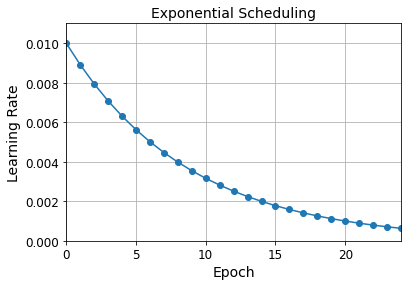

In [47]:
plt.plot(history.epoch, history.history["lr"], "o-")
plt.axis([0, n_epochs - 1, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Exponential Scheduling", fontsize=14)
plt.grid(True)
plt.show()

Note: If you want to use learning rate decay, it is probably better to use a Keras built in function like [ExponentialDecay](https://keras.io/api/optimizers/learning_rate_schedules/exponential_decay/) and not program it yourself.

## Task 6: Performance Scheduling

For performance scheduling, use the `ReduceLROnPlateau` callback. For example, if you pass the following callback to the `fit()` method, it will multiply the learning rate by 0.5 whenever the best validation loss does not improve for two consecutive epochs:

`lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)`

**Task 6:**   
a) Re-use (copy-pasta) the NN from Task 5: two hidden layers with 300 and 100 nodes and BatchNormalization layers before the dense layers. But, now use Adam optimizer with a initial lr=0.01,   
b) Compare the results with the previous one (Task 5),   
c) Comment on the learning rate as a function of epochs using the plot given below.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [48]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)

In [49]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="relu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 8s 4ms/step - loss: 0.5251 - accuracy: 0.8083 - val_loss: 0.3883 - val_accuracy: 0.8588 - lr: 0.0200
Epoch 2/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3875 - accuracy: 0.8569 - val_loss: 0.4031 - val_accuracy: 0.8578 - lr: 0.0200
Epoch 3/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3501 - accuracy: 0.8680 - val_loss: 0.3420 - val_accuracy: 0.8744 - lr: 0.0200
Epoch 4/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3259 - accuracy: 0.8779 - val_loss: 0.3196 - val_accuracy: 0.8830 - lr: 0.0200
Epoch 5/25
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3074 - accuracy: 0.8844 - val_loss: 0.3137 - val_accuracy: 0.8818 - lr: 0.0200
Epoch 6/25
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2934 - accuracy: 0.8911 - val_loss: 0.3240 - val_accuracy: 0.8838 - lr: 0.0200
Epoch 7/25
1719/1719 [==============================] - 8s

In [50]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3123 - accuracy: 0.8974


[0.31227925419807434, 0.8974000215530396]

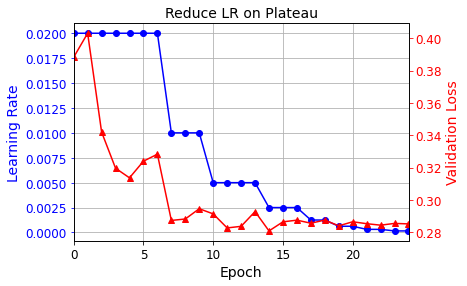

In [51]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

Task 6 c) answer:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

## Task 7 Avoiding Overfitting Through Regularization
Our models above all overfit (why?). Let's now tackle this problem using dropout.

**Task 7:**   
a) Copy the code for the model of Task 6, add a dropout (20% rate) before each hidden layer (https://keras.io/api/layers/regularization_layers/dropout/),    
b) Compare the results.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [52]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=[lr_scheduler])

Epoch 1/25
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5793 - accuracy: 0.7895 - val_loss: 0.3939 - val_accuracy: 0.8604 - lr: 0.0010
Epoch 2/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4433 - accuracy: 0.8367 - val_loss: 0.3627 - val_accuracy: 0.8658 - lr: 0.0010
Epoch 3/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4121 - accuracy: 0.8475 - val_loss: 0.3604 - val_accuracy: 0.8640 - lr: 0.0010
Epoch 4/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3904 - accuracy: 0.8559 - val_loss: 0.3286 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 5/25
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3764 - accuracy: 0.8604 - val_loss: 0.3261 - val_accuracy: 0.8810 - lr: 0.0010
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3657 - accuracy: 0.8644 - val_loss: 0.3266 - val_accuracy: 0.8776 - lr: 0.0010
Epoch 7/25
1719/1719 [==============================

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

In [53]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2958 - accuracy: 0.8923


[0.2958023250102997, 0.892300009727478]

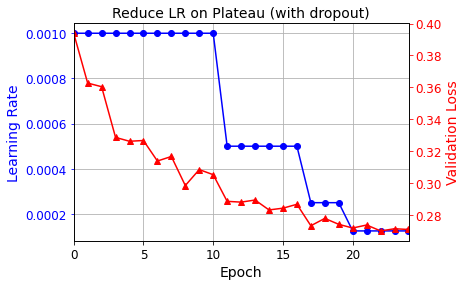

In [54]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, n_epochs - 1)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau (with dropout)", fontsize=14)
plt.show()

# Optional Exercise (Bonus points): Using Callbacks during Training

**Task 8:** Add to your model of Task 7 the following callbacks (check Chapter 10 and https://keras.io/api/callbacks/)   
a) Checkpoint   
b) Early stopping (5 epochs)   
c) Tensorboard log   
d) Discuss the result 

In [55]:
# model = 

In [ ]:
#Define callbacks
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=2)
early_stopping_cb = 
model_checkpoint_cb =
tensorboard_cb =

In [ ]:
callbacks = [lr_scheduler, early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.01)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 50
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=./my_fashion_logs --port=6006